In [1]:
from __future__ import division, print_function, absolute_import
import numpy as np


from phidl import Device, Layer, LayerSet, make_device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg
import phidl.routing as pr
import phidl.utilities as pu

In [2]:
#==============================================================================
# Helpful (but not necessary) notes about plotting. (Can be skipped)
#==============================================================================
# Note: If you have Qt + PyQt installed, you may be able to use the much
# faster quickplot2() function, which acts like KLayout (try zooming with
# the mousewheel, and right-click-dragging to zoom). The F1/F2/F3 keys also
# show/hide Ports, Subports, and Aliases respectively.  The Esc key resets
# the view
#
# We recommend trying the following just to see if it works:
# >>> from phidl import quickplot2 as qp
# >>> import phidl.geometry as pg
# >>> qp(pg.rectangle())
#
# If that doesn't work and you're using IPython, try using the command
# >>> %gui qt
#==============================================================================

# Uncomment this if you're using the original quickplot (not quickplot2)
# and you'd like to see each result in a new window
# import functools
# qp = functools.partial(qp, new_window = True)

In [3]:
#==============================================================================
#==============================================================================
#==============================================================================
# PHIDL TUTORIAL START
#==============================================================================
#==============================================================================
#==============================================================================


#==============================================================================
# We'll start by assuming we have a function waveguide() which already exists
# and makes us a simple waveguide rectangle.  Many functions like this
# exist in the phidl.geometry library and are ready-for-use.  We write this
# one out fully just so it's explicitly clear what's happening
#==============================================================================

def waveguide(width = 10, height = 1):
    WG = Device('waveguide')
    WG.add_polygon( [(0, 0), (width, 0), (width, height), (0, height)] )
    WG.add_port(name = 'wgport1', midpoint = [0,height/2], width = height, orientation = 180)
    WG.add_port(name = 'wgport2', midpoint = [width,height/2], width = height, orientation = 0)
    return WG

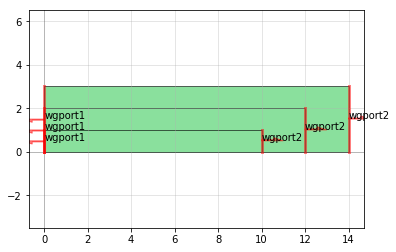

In [4]:
#==============================================================================
# Create a blank device
#==============================================================================
# Let's create a new device ``D`` which will act as a blank canvas (D can be 
# thought of as a blank GDS cell with some special features). Note that when we
# make a Device, we usually assign it a variable name with a capital letter
D = Device('MultiWaveguide')

# Now say we want to add a few waveguides to to our "Device" D.
# First we create the waveguides.  As you can see from the waveguide() function
# definition, the waveguide() function creates another Device ("WG").
# This can be thought of as the waveguide() function creating another GDS cell,
# only this one has some geometry inside it.
#
# Let's create two of these Devices by calling the waveguide() function
WG1 = waveguide(width=10, height = 1)
WG2 = waveguide(width=12, height = 2)

# Now we've made two waveguides Device WG1 and WG2, and we have a blank
# device D. We can add references from the devices WG1 and WG2 to our blank
# device byz using the add_ref() function.
# After adding WG1, we see that the add_ref() function returns a handle to our
# reference, which we will label with lowercase letters wg1 and wg2.  This
# handle will be useful later when we want to move wg1 and wg2 around in D.
wg1 = D.add_ref(WG1)  # Using the function add_ref()
wg2 = D << WG2        # Using the << operator which is identical to add_ref()

# Alternatively, we can do this all on one line
wg3 = D.add_ref(waveguide(width=14, height = 3))

qp(D) # quickplot it!

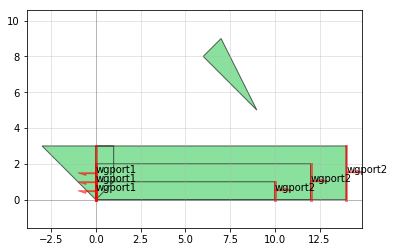

In [5]:
#==============================================================================
# Creating polygons
#==============================================================================
# Create and add a polygon from separate lists of x points and y points
# e.g. [(x1, x2, x3, ...), (y1, y2, y3, ...)]
poly1 = D.add_polygon( [(8,6,7,9), (6,8,9,5)] )

# Alternatively, create and add a polygon from a list of points
# e.g. [(x1,y1), (x2,y2), (x3,y3), ...] using the same function
poly2 = D.add_polygon( [(0, 0), (1, 1), (1, 3), (-3, 3)] )

qp(D) # quickplot it!

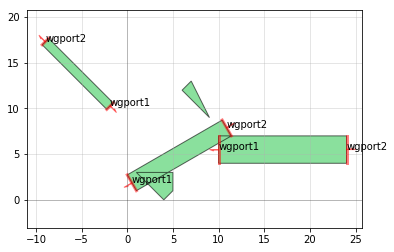

In [6]:
#==============================================================================
# Manipulating geometry 1 - Basic movement and rotation
#==============================================================================
# There are several actions we can take to move and rotate the geometry.  These
# actions include movement, rotation, and reflection.

wg1.move([10,4]) # Shift the second waveguide we created over by dx = 10, dy = 4
wg2.move(origin = [1,1], destination = [2,2]) # Shift the second waveguide over by dx = 1, dy = 1
wg3.move([1,1], [5,5], axis = 'y') # Shift the third waveguide over by dx = 0, dy = 4 (motion only along y-axis)
poly1.movey(4) # Same as specifying axis='y' in the move() command
poly2.movex(4) # Same as specifying axis='x'' in the move() command
wg3.movex(30,40) # Moves "from" x=30 "to" x=40 (e.g. shifts wg3 by +10 in the x-direction)

wg1.rotate(45) # Rotate the first waveguide by 45 degrees around (0,0)
wg2.rotate(30, center = [1,1]) # Rotate the second waveguide by 30 degrees around (1,1)

wg1.reflect(p1 = [1,1], p2 = [1,3]) # Reflects wg3 across the line formed by p1 and p2

qp(D) # quickplot it!

[[-9.3137085   9.89949494]
 [-1.53553391 17.67766953]]
7.778174593052022
7.778174593052023
[-5.4246212  13.78858223]
11.392304845413264


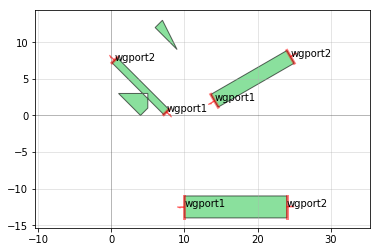

In [7]:
#==============================================================================
# Manipulating geometry 2 - Properties
#==============================================================================
# Each Device and DeviceReference object has several properties which can be used to learn
# information about the object (for instance where it's center coordinate is).  Several
# of these properties can actually be used to move the geometry by assigning them
# new values

print(wg1.bbox) # Will print the bounding box of wg1 in terms of [(xmin, ymin), (xmax, ymax)]
print(wg1.xsize) # Will print the width of wg1 in the x dimension
print(wg1.ysize) # Will print the height of wg1 in the y dimension

print(wg1.center) # Gives you the center coordinate of its bounding box
wg1.center = [4,4] # Shift wg1 such that the center coordinate of its bounding box is at (4,4)

print(wg2.xmax) # Gives you the rightmost (+x) edge of the wg2 bounding box
wg2.xmax = 25 # Moves wg2 such that it's rightmost edge is at x = 25

wg2.y = 5 # Sets the y-coordingate of the center of the shape's bounding box

wg3.ymin # Gives you the bottommost (-y) edge of the wg3 bounding box
wg3.ymin = -14 # Moves wg3 such that it's bottommost edge is at y = -14


qp(D) # quickplot it!

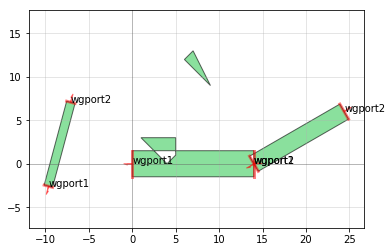

In [8]:
#==============================================================================
# Manipulating geometry 3 - Smarter movement with ports
#==============================================================================
# All the waveguides we made have two ports: 'wgport1' and 'wgport2'  We can 
# use these names in place of (x,y) pairs.  For instance, if we want to move
# wg1 such that its port 'wgport1' rests on the origin, we do:
wg1.move(origin = 'wgport1', destination = [0,0])
# Alternatively, we can use the Port object itself in the same manner.  We can
# access the Port objects for any Device (or DeviceReference) by calling device.ports,
# --which returns a Python dictionary--and accessing its value with the key
wg3.move(origin = wg3.ports['wgport1'], destination = [0,0])
# We can even move one port to another 
wg2.move(origin = wg2.ports['wgport1'], destination = wg3.ports['wgport2'])
# Several functions beyond just move() can take Ports as inputs
wg1.rotate(angle = -60, center = wg1.ports['wgport2'])
wg3.reflect(p1 = wg3.ports['wgport1'].midpoint, p2 = wg3.ports['wgport1'].midpoint + np.array([1,0]))

qp(D) # quickplot it!

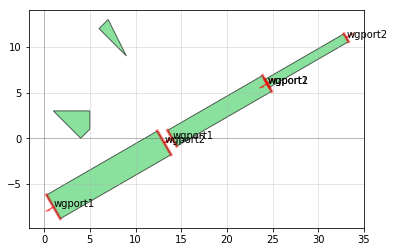

In [9]:
#==============================================================================
# Manipulating geometry 4 - Chaining commands
#==============================================================================
# Many of the functions in Device return the object they manipulate.  We can use
# this to chain commands in a single line. For instance these two expressions:
wg1.rotate(angle = 15, center = [0,0])
wg1.move([10,20])

# ...are equivalent to this single-line expression
wg1.rotate(angle = 15, center = [0,0]).move([10,20])



#==============================================================================
# Connecting devices with connect()
#==============================================================================
# The connect command allows us to connect DeviceReference ports together like 
# Lego blocks.  There is an optional parameter called ``overlap`` which is
# useful if you have shapes you want to intersect with some overlap (or with a
# negative number, separate the ports).
wg1.connect(port = 'wgport1', destination = wg2.ports['wgport2'])
wg3.connect(port = 'wgport2', destination = wg2.ports['wgport1'], overlap = -1)

qp(D) # quickplot it!

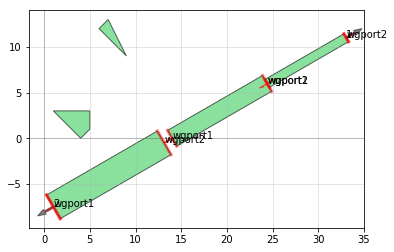

In [10]:
#==============================================================================
# Adding ports
#==============================================================================
# Although our waveguides wg1/wg2/wg3 have ports, they're only references
# of the device ``D`` we're working in, and D itself does not -- it only draws
# the subports (ports of wg1, wg2, wg3) as a convenience.  We need to add ports
# that we specifically want in our new device ``D``. add_port() can take a 
# port argument which allows you to pass it an underlying reference port to 
# copy. You can also rename the port if you desire:
p1 = D.add_port(port = wg1.ports['wgport2'], name = 1)
p2 = D.add_port(port = wg3.ports['wgport1'], name = 2)

# Optionally, let's assign some information to these ports.  Every Port has
# a Port.info dictionary which can be used to store information about that port
p1.info['is_useful'] = True
p2.info['is_useful'] = False


qp(D) # quickplot it!

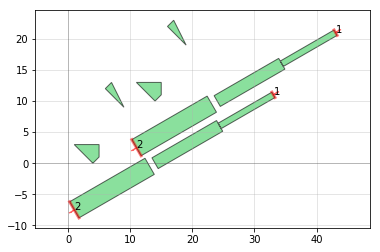

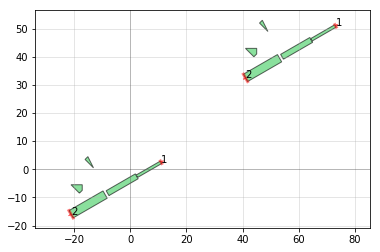

In [11]:
#==============================================================================
# Taking things a level higher
#==============================================================================
# Now that we have our device ``D`` which is a multi-waveguide device, we
# can add references to that device in a new blank canvas we'll call ``D2``.
# We'll add two copies of ``D`` to D2, and shift one so we can see them both
D2 = Device('MultiMultiWaveguide')
mwg1 = D2.add_ref(D)
mwg2 = D2.add_ref(D)
mwg2.move(destination = [10,10])

qp(D2) # quickplot it!

# Like before, let's connect mwg1 and mwg2 together then offset them slightly
mwg1.connect(port = 1, destination = mwg2.ports[2])
mwg2.move(destination = [30,30])

qp(D2) # quickplot it!

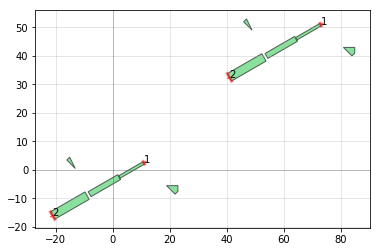

In [12]:
# Since the references mwg1 and mwg2 only point to the device ``D``, any
# changes that we make to the original ``D`` will be reflected in ``D2``

poly2.x += 40

qp(D2) # quickplot it!

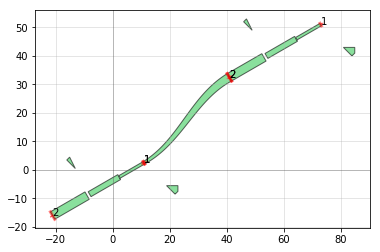

In [13]:
#==============================================================================
# Routing
#==============================================================================
# Routing allows us to connect two ports which face each other with a smooth
# polygon.  Since we connected our two 
D2.add_ref( pr.route_basic(port1 = mwg1.ports[1], port2 = mwg2.ports[2],
            path_type = 'sine', width_type = 'straight') )
qp(D2)

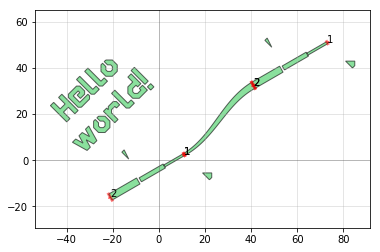

In [14]:
#==============================================================================
# Adding text
#==============================================================================
# The function text() creates a Device, just like waveguide.  Use it and 
# manipulate it like any other Device
t = D2.add_ref( pg.text('Hello\nworld!', size = 10, justify = 'center'))
t.move([0,40]).rotate(45)
qp(D2)

In [15]:
#==============================================================================
# Labeling
#==============================================================================
# We can also label (annotate) our devices, in order to record information 
# directly into the final GDS file without putting any extra geometry onto any 
# layer
# This label will display in a GDS viewer, but will not be rendered
# or printed like the polygons created by the text()


D2.label(text = 'First label', position = mwg1.center)
D2.label('Second label', mwg2.center)

# It's very useful for recording information about the devices or layout
D2.label(text = 'The x size of this\nlayout is %s' % D2.xsize,
            position = (D2.xmax, D2.ymax), layer = 255)

# Again, note we have to write the GDS for it to be visible (view in KLayout)
D2.write_gds('MultiMultiWaveguideWithLabels.gds')

'MultiMultiWaveguideWithLabels.gds'

In [16]:
#==============================================================================
# Saving the file as a .gds
#==============================================================================
D2.write_gds('MultiMultiWaveguideTutorial.gds')

# If we want to use different units than micron units, we can do that too.
# say instead of microns (1e-6) with nanometer precision (1e-6*1e-3),
# we want to use millimeters (1e-3) subdivided onto a 10-micron grid,
# our precision would then be (1e-2) so the grid would be (1e-3*1e-2) = 10e-6
D2.write_gds('MultiMultiWaveguideTutorialNewUnits.gds',
             unit = 1e-3, precision = 1e-2)

'MultiMultiWaveguideTutorialNewUnits.gds'

In [17]:
#==============================================================================
# Advanced: Acquiring port information
#==============================================================================
# In some cases, you may want to gather information about the ports in your
# Device.  You can do that using the get_ports(depth) function, which will
# return ports within the device

# This is empty as D2 does not have any ports of its own, only ports within
# its references
top_level_ports = D2.get_ports(depth = 0)

# This gets the ports from the refrences we added to D2 (mwg1 and mwg2)
first_level_ports = D2.get_ports(depth = 1)

# This gets all the ports from every level
all_ports = D2.get_ports(depth = None)

# We can then filter to find the locations of all ports we defined as "useful":
for p in all_ports:
    if 'is_useful' in p.info and p.info['is_useful'] is True:
        print(str(p) + ' is useful')

Port (name 1, midpoint [11.00961894  2.5       ], width 1, orientation 30.0) is useful
Port (name 1, midpoint [73.05255888 51.        ], width 1, orientation 30.0) is useful


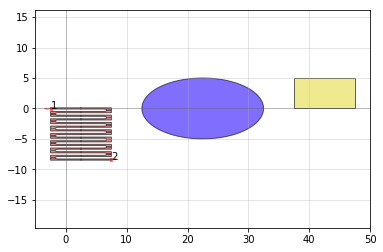

'MyNewGDS.gds'

In [18]:
#==============================================================================
# Adding premade geometry with phidl.geometry
#==============================================================================
# Usually at the beginning of a phidl file we import the phidl.geometry module
# as ``pg``, like this:
import phidl.geometry as pg

# The ``pg`` module contains dozens of premade shapes and structures, ranging
# from simple ones like ellipses to complex photonic structures.  Let's create
# a few simple structures and plot them
D = Device()
G1 = pg.ellipse(radii = (10,5), angle_resolution = 2.5, layer = 1)
G2 = pg.snspd(wire_width = 0.2, wire_pitch = 0.6, size = (10,8), layer = 2)
G3 = pg.rectangle(size = (10,5), layer = 3)
g1 = D.add_ref(G1)
g2 = D.add_ref(G2)
g3 = D.add_ref(G3)
g1.xmin = g2.xmax + 5
g3.xmin = g1.xmax + 5
qp(D)

# There are dozens of these types of structures.  See the /phidl/geometry.py
# file for a full geometry list.  Note some of the more complex shapes are 
# experimental and may change with time.


# Let's save this file so we can practice importing it in the next step
D.write_gds('MyNewGDS.gds')

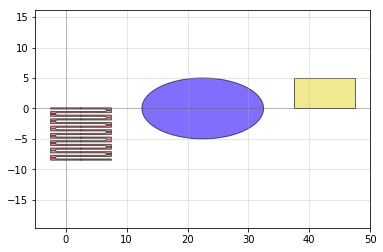

In [19]:
#==============================================================================
# Importing GDS files
#==============================================================================
# The phidl.geometry module is responsible for generating premade Devices.  
# This includes imported geometry from other GDS files too.  When you import
# a GDS, you specify which layers you want, and it will import those layers
# as a new Device.  The new device can then be manipulated like any other.

# Let's import the GDS we just saved in the previous step.  Although generally
# you must specify which cell in the GDS file you want to import using the 
# argument `cellname`, if the GDS file has only one top-level cell (like our
# MyLayerSetPreview.gds file does), the cellname argument can be left out and 
# import_gds() will import that top-level cell.

# Let's first just import the entire GDS as-is
E = pg.import_gds(filename = 'MyNewGDS.gds')
qp(E)


# Similarly, we can import the same file but flatten the entire cell
# heirarchy
E2 = pg.import_gds(filename = 'MyNewGDS.gds', flatten = True)

In [20]:
#==============================================================================
# Using Layers
#==============================================================================
# Let's make a new blank device DL and add some text to it, but this time on
# different layers
DL = Device()

# You can specify any layer in one of three ways:
# 1) as a single number 0-255 representing the gds layer number, e.g. layer = 1
# where the gds layer datatype will be automatically set to zero
DL.add_ref( pg.text('Layer1', size = 10, layer = 1) )


# 2) as a 2-element list [0,1] or tuple (0,1) representing the gds layer 
# number (0-255) and gds layer datatype (0-255)  
DL.add_ref( pg.text('Layer2', size = 10, layer = [2,5]) ).movey(-20)

# 3) as a Layer object  
my_gold_layer = Layer(gds_layer = 3, gds_datatype = 0, name = 'goldpads', description = 'Gold pads liftoff')
my_unused_layer = Layer(240,1) # Creates a Layer for GDS layer 240 (dataype 1)
DL.add_ref( pg.text('Layer3', size = 10, layer = my_gold_layer) ).movey(-40)

DeviceReference (parent Device "text000033", ports [], origin [  0 -40], rotation 0, x_reflection False)

In [21]:
#==============================================================================
# Advanced layers: Generating geometry on multiple layers at once
#==============================================================================
# Say we want to create the same ellipse on several different layers.  We can
# do that by using a Python `set` of layers.  So if we want to add it to three
# layers, say GDS layer 1 datatype 0, GDS layer 3 datatype 5, and GDS layer 7
# datatype 8:

# Note each element of the set must be a valid layer input by itself
my_layers = {1, (3,5), (7,8)}
# When you apply the set to add_polygon, you get a list of the returned polygons
polygon_list = D.add_polygon( [(0, 0), (1, 1), (1, 3), (-3, 3)], layer = my_layers)
print([(p.layers[0], p.datatypes[0]) for p in polygon_list])

# However, when you use it on a phidl.geometry function, it does not produce
# multiple Devices! It will only produce a single Device with geometry on all 
# of your specified layers. This is because the `layer` argument is passed 
# transparently to the add_polygon() function through the function
E = pg.ellipse(layer = {4, 8, 19})
print(E.layers)

[(1, 0), (7, 8), (3, 5)]
{8, 19, 4}


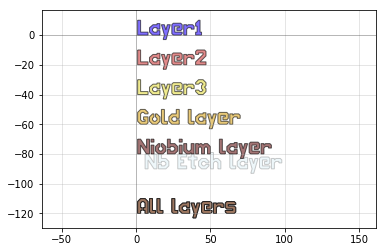

'MultipleLayerText.gds'

In [22]:
#==============================================================================
# Advanced layers: Containing multiple Layers in a LayerSet object
#==============================================================================
# What you can also do is make a LayerSet, which lets you
# conveniently call each Layer object just by its name.  You can also specify
# the layer color using an RGB triplet e.g (0.1, 0.4, 0.2), an HTML hex color 
# (e.g. #a31df4), or a CSS3 color name (e.g. 'gold' or 'lightblue'
# see http://www.w3schools.com/colors/colors_names.asp )
# The 'alpha' argument also lets you specify how transparent that layer should
# look when using quickplot (has no effect on the written GDS file)

ls = LayerSet() # Create a blank LayerSet
ls.add_layer(name = 'au', gds_layer = 4, gds_datatype = 0,  description = 'Gold wiring', color = 'goldenrod')
ls.add_layer(name = 'nb', gds_layer = 5, gds_datatype = 0,  description = 'Niobium liftoff', color = (0.4,0.1,0.1))
ls.add_layer('nb_etch', 6, 0, color = 'lightblue', alpha = 0.2)


ls['au']

# Now that our layers are defined, we can call them from the LayerSet in the same way
# we would from a dictionary, where the name becomes the key:
text1 = DL.add_ref( pg.text('Gold layer', size = 10, layer = ls['au']) ).movey(-60)
text2 = DL.add_ref( pg.text('Niobium layer', size = 10, layer = ls['nb']) ).movey(-80)
text3 = DL.add_ref( pg.text('Nb Etch layer', size = 10, layer = ls['nb_etch']) ).movey(-90).movex(5)


# We can additionally use a LayerSet to add the same structure to several
# layers at once by passing the whole layerset to the layer argument
text4 = DL.add_ref( pg.text('All layers', size = 10, layer = ls) ).movey(-120)


qp(DL)
DL.write_gds('MultipleLayerText.gds')

Layer (name nb, GDS layer 5, GDS datatype 0, description Niobium liftoff, color #661919)


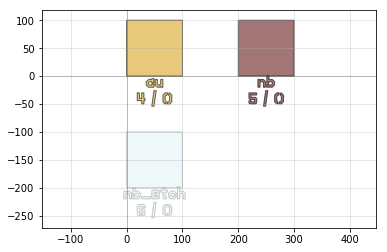

'MyLayerSetPreview.gds'

In [23]:
# If we want to examine any single layer, we can call them by their names,
# for example
gold_layer = ls['au']
print(ls['nb'])

# We can quickly preview our color scheme using the LayerSet.preview()
# function as well.
P = pg.preview_layerset(ls)
qp(P)
P.write_gds('MyLayerSetPreview.gds')

In [24]:
# We can even save the LayerSet as a KLayout .lyp file ("layer properties" file)
# useful for getting the color scheme in KLayout to match quickplot
import phidl.utilities as pu
pu.write_lyp('MyLayerSetPreview.lyp', layerset = ls)

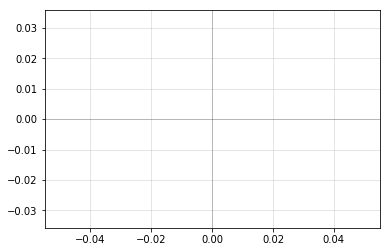

In [25]:
#==============================================================================
# Removing  layers
#==============================================================================
# Now say we only wanted to get layers 4 and 5 from an imported.  We can remove
# the unwanted layers using the remove_layers() function
D = pg.import_gds(filename = 'MyLayerSetPreview.gds')

# We set "invert_selection" to True so that all layers EXCEPT 4 and 5
# are removed
# D.remove_layers(layers = [4,5], invert_selection = True)
# qp(D)
# If we later decide that we actually don't want layer 4, as well, we
# can leave the `invert_selection` argument blank
D.remove_layers(layers = [4])
qp(D)

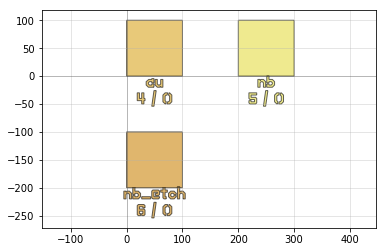

In [26]:
#==============================================================================
# Remapping layers
#==============================================================================
# Let's import our layerset preview again
D = pg.import_gds(filename = 'MyLayerSetPreview.gds')

# We can use the remap_layers() function to map layers arbitrarily. Say we
# wanted to move shapes on layer 5 to layer 99, and layer 6 to layer 77
# but leave the other layers alone.  We can map layers 5->99, 6->77, and leave
# any other layers alone by passing a dict to the `layermap` argument
D.remap_layers(layermap = {5: 99, 6:77})
qp(D)

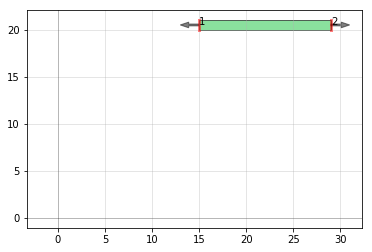

In [27]:
#==============================================================================
# Constructing a Device from set of parameters (dictionary or config file)
#==============================================================================
# Say we want to make a more complicated waveguide which requires more
# parameters.  Instead of passing them individually, we can store them in a
# dictionary (or configuration file) and pass that dictionary to the Device()
# function.

def complicated_waveguide(width = 10, height = 1, x = 10, y = 25, rotation = 15):
    C = Device('complicated_waveguide')
    C.add_polygon( [(0, 0), (width, 0), (width, height), (0, height)] )
    C.add_port(name = 1, midpoint = [0,height/2], width = height, orientation = 180)
    C.add_port(name = 2, midpoint = [width,height/2], width = height, orientation = 0)
    C.rotate(angle = rotation, center = (0,0))
    C.move((x,y))
    return C
    
cwg_parameters = {
            'width' : 14,
            'height' : 1,
            'x' : 15,
            'y' : 20,
            'rotation' : 0
            }

# We can either create the complicated_waveguide() the normal way
C1 = complicated_waveguide(width = 14, height = 1, x = 15, y = 20, rotation = 0)
qp(C1)

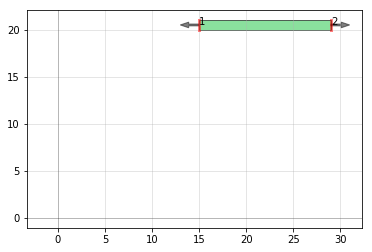

In [28]:
# Or we can pass the complicated_waveguide function and our parameter list
# to the Device() function which will generate it for us using our config
C2 = make_device(complicated_waveguide, config = cwg_parameters)
qp(C2)

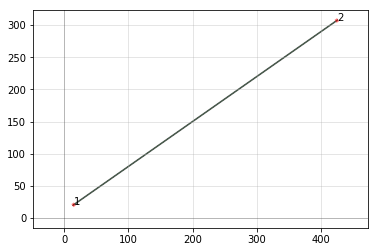

In [29]:
# We can also override any parameter we like in our dictionary of parameters
# by adding keyword arguments -- the input dictionary is untouched afterwards
C3 = make_device(complicated_waveguide, config = cwg_parameters, width = 500, rotation = 35)
qp(C3)

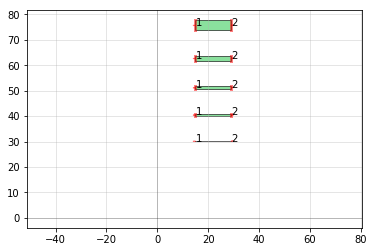

In [30]:
# The most useful implementation of this is to keep a standard set of 
# parameters and then override certain parameters each iteration of the for 
# loop. Say we want to use our standard cwg_parameters but change the height
#  each time:
D = Device()
for h in [0.1, 0.5, 1, 2, 4]:
    C4 = make_device(complicated_waveguide, config = cwg_parameters, height = h)
    c4 = D.add_ref( C4 )
    c4.ymin = D.ymax + 10
qp(D)

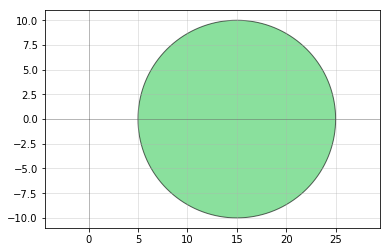

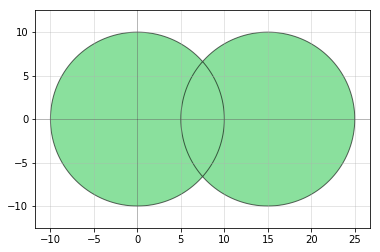

In [31]:
#==============================================================================
# Keeping track of geometry using the "alias" functionality
#==============================================================================
# It can be useful to keep track of our DeviceReferences without
# needing to assign the reference to a variable.  We can do this by specifying
# an 'alias' for the added DeviceReference.

# For instance, if we wanted to keep track of a circle references twice in D,
# we might normally assign each reference to a separate variable:
D = Device()
C = pg.circle()
c1 = D.add_ref(C)   # Add first reference
c2 = D.add_ref(C)   # Add second reference
c2.x += 15          # Move the second circle over by 10
qp(c2)
qp(D)

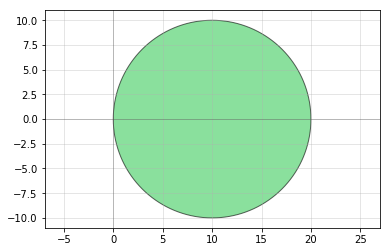

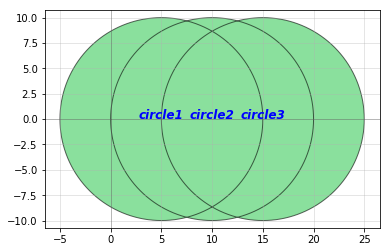

{'circle1': DeviceReference (parent Device "circle000095", ports [], origin [5. 0.], rotation 0, x_reflection False), 'circle2': DeviceReference (parent Device "circle000095", ports [], origin [10.  0.], rotation 0, x_reflection False), 'circle3': DeviceReference (parent Device "circle000095", ports [], origin [15.  0.], rotation 0, x_reflection False)}
dict_keys(['circle1', 'circle2', 'circle3'])


In [32]:
# But rather than cluttering up the list of variables with these refernces,
# we can instead create 'aliases' to each reference, and call them directly
# out of D like you would with a Python dictionary.  For example:
D = Device()
C = pg.circle()
D.add_ref(C, alias = 'circle1') # Add first reference
D['circle2'] = D.add_ref(C) # Add second reference in a different style
D['circle3'] = D << C # Add third reference in yet another way!

# Even though we created these references/aliases three different ways,
# they all behave the same way:
D['circle1'].x += 5            # Moving the second circle over by 5
D['circle2'].x += 10            # Moving the second circle over by 10
D['circle3'].x += 15            # Moving the second circle over by 15
# Note that at this point, D['circle2'] is equivalent to the variable c2
# we made above
qp(D['circle2'], label_aliases = True)
qp(D, label_aliases = True)

# You can also access the list of aliases for your Device whenever you want 
# to by accessing Device.aliases, which is a Python dictionary.  For example:
print(D.aliases)
print(D.aliases.keys())

In [33]:
#==============================================================================
# Flattening a Device
#==============================================================================
# Sometimes you want to remove references from a Device while keeping all
# of the shapes/polygons intact and in place.  The D.flatten() keeps all the 
# polygons in D, but removes all the underlying references it's attached to.
# Also, if you specify the `single_layer` argument it will move all of the
# polyons to that single layer

D = Device()
E1 = pg.ellipse(layer = 1)
E2 = pg.ellipse(layer = 2)
D.add_ref(E1)
D.add_ref(E2).movex(15)

D.write_gds('D_ellipses.gds')
D.flatten()
D.write_gds('D_ellipses_flattened.gds')
D.flatten(single_layer = 5)
D.write_gds('D_ellipses_flattened_singlelayer.gds')

'D_ellipses_flattened_singlelayer.gds'

In [34]:
#==============================================================================
# Decluttering - Absorbing references into a main Device
#==============================================================================
# Say you had a Device "D" which contains several references named 
# "ref1", "ref2", "ref_cluttered".  Suppose the reference "ref_cluttered" is 
# cluttering up your cell hierarchy when you're viewing it in your favorite
# GDS viewer.  The D.absorb() function can eliminate the "ref_cluttered"
# hierarchy while maintaining the geometry -- it strips out all the polygons
# from "ref_cluttered" and adds them directly to "D", then removes
# the reference "ref_cluttered" from D entirely

D = Device()
E1 = pg.ellipse(layer = 1)
E2 = pg.ellipse(layer = 2)
 # The SNSPD has a lot of underlying hierarchy
S1 = pg.snspd(layer = 3)
ref1 = D.add_ref(E1)
ref2 = D.add_ref(E2).movex(50)
ref_cluttered = D.add_ref(S1).movex(100)

D.write_gds('D_cluttered.gds')
D.absorb(ref_cluttered)
D.write_gds('D_de_cluttered.gds')

'D_de_cluttered.gds'

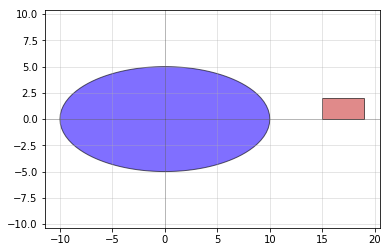

In [35]:
#==============================================================================
# Copying a Device
#==============================================================================
# Since copying a Device involves creating a new geometry, you can copy a 
# Device D using the pg.copy(D) or pg.deepcopy(D) function.  pg.copy(D) 
# maintains the underlying connections to other Device, so that newly-created 
# Device uses the same references as the original device.  Conversely, 
# pg.deepcopy() creates completely new copies of every underlying polygon and
# reference, so that the newly-created Device shares no dependencies/references
# with the original Device.  These functions are especially useful if 
# you want to flatten a geometry without damaging the structure of the 
# original Device.

D = Device()
E1 = pg.ellipse(layer = 1)
E2 = pg.rectangle(layer = 2)
D.add_ref(E1)
D.add_ref(E2).movex(15)

D_copied = pg.copy(D)
qp(D_copied)

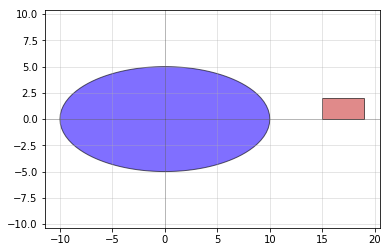

In [36]:
# Observe that if we add geometry to D now, D_copied is unaffected
D.add_ref(pg.circle()) 
D.rotate(45)
qp(D_copied)

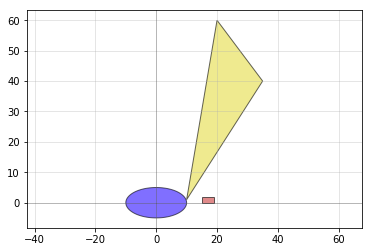

In [37]:
# However, note that if we now modify the underlying Devices (which
# were referenced in D, and whose references were copied to D_copied), both
# the original D and D_copied are affected:
E1.add_polygon([[10,20,35], [1,60,40]], layer = 3)
qp(D_copied)

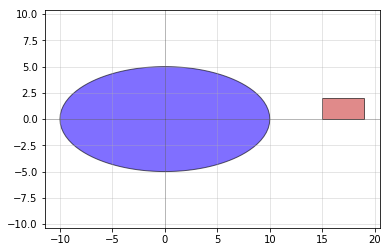

In [38]:
# If instead we use pg.deepcopy(), all of the underlying references are copied
# and used in the new D_deepcopied device.  So if we change one of the old
# references, the new D_deepcopied doesn't get affected
D = Device()
E1 = pg.ellipse(layer = 1)
E2 = pg.rectangle(layer = 2)
D.add_ref(E1)
D.add_ref(E2).movex(15)

D_deepcopied = pg.deepcopy(D)
qp(D_deepcopied)

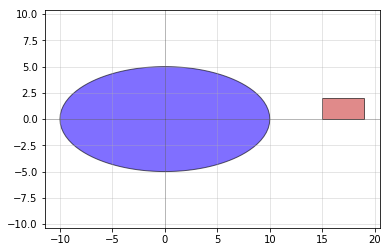

In [39]:
# As before, if we add geometry to D now, D_deepcopied is unaffected
D.add_ref(pg.circle()) 
D.rotate(45)
qp(D_deepcopied)

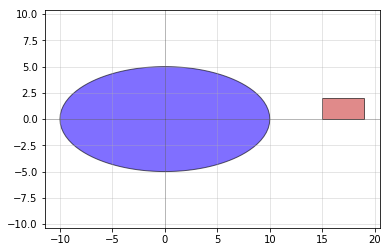

In [40]:
# However, now if we mess with the underlying Devices of D, D_deepcopied
# is not affected like it was before.
E1.add_polygon([[10,20,35], [1,60,40]], layer = 3)
qp(D_deepcopied)

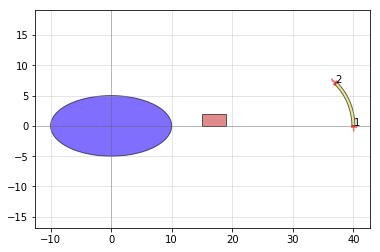

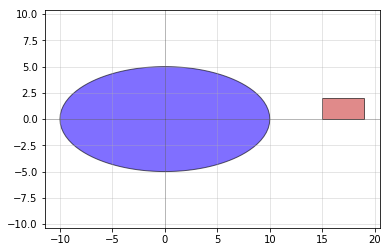

In [41]:
#==============================================================================
# Extracting layers
#==============================================================================
# Say you want to grab all the polygons of a single layer from your Device. You 
# can do this using the pg.extract() function, which will create a new Device
# with all of the polygons from D.  Note that the Device created from this
# function is necessarily flattened (otherwise it could inadvertantly modify 
# other Devices which share references with the extracted Device)

D = Device()
E1 = pg.ellipse(layer = 1)
E2 = pg.rectangle(layer = 2)
E3 = pg.arc(layer = 3)
D.add_ref(E1)
D.add_ref(E2).movex(15)
D.add_ref(E3).movex(30)
qp(D)

D_only_layers_1_and_2 = pg.extract(D, layers = [1,2])
qp(D_only_layers_1_and_2)

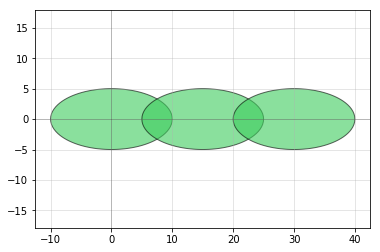

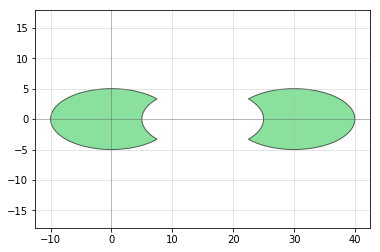

In [42]:
#==============================================================================
# Making boolean shapes
#==============================================================================
# If you want to subtract one shape from another, merge two shapes, or 
# perform an XOR on them, you can do that with the pg.boolean() function.
# the ``operation`` argument should be {not, and, or, xor, 'A-B', 'B-A', 'A+B'}.
# Note that 'A+B' is equivalent to 'or', 'A-B' is equivalent to 'not', and
#  'B-A' is equivalent to 'not' with the operands switched

D = Device()
E1 = pg.ellipse()
E2 = pg.ellipse().movex(15)
E3 = pg.ellipse().movex(30)
qp([E1, E2, E3])

D2 = pg.boolean(A = [E1, E3], B = E2, operation = 'A-B')
qp(D2)

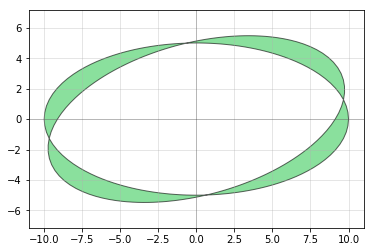

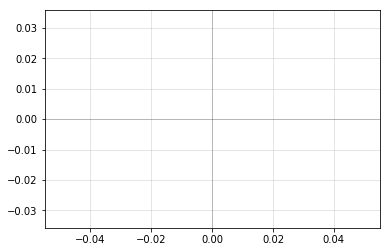

E1 != E2 because X1 is not blank: it has total polygon area 38.28322200000009
E1 == E3 because X2 is blank: it has total polygon area 0


In [43]:
#==============================================================================
# Comparing two Devices
#==============================================================================
# Sometimes you want to be able to test whether two Devices are identical or
# not (similar to the "diff" of a text file).  You can perform this comparison
# by using the pg.xor_diff(A, B) function.  It will perform a layer-by-layer  
# XOR difference between the Devices A and B, and returns polygons representing 
# the differences between A and B.

D = Device()
E1 = pg.ellipse()
E2 = pg.ellipse().rotate(15)
E3 = pg.ellipse()

# Let's compare two slightly different Devices
X1 = pg.xor_diff(A = E1, B = E2)
# When we plot the result, we see only the differences between E1 and E2
qp(X1) 

# Now let's compare two identical Devices
X2 = pg.xor_diff(A = E1, B = E3)
qp(X2) # In this case X2 is empty -- therefore E1 and E3 are identical!

# We can double-check this by computing the area of each device
print('E1 != E2 because X1 is not blank: it has total polygon area %s' % X1.area())
print('E1 == E3 because X2 is blank: it has total polygon area %s' % X2.area())

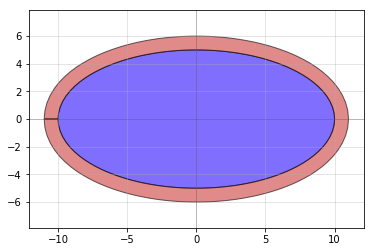

In [44]:
#==============================================================================
# Creating outlines of shapes
#==============================================================================
# Sometimes, when writing in a positive-tone resist, it is useful to produce 
# an outline of an existing shape. The pg.outline() function allows you to do
# exactly that

D = pg.ellipse(layer = 1)
D2 = pg.outline(D, distance = 1, layer = 2)
qp([D, D2])

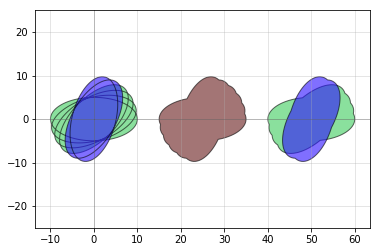

In [45]:
#==============================================================================
# Joining (Unioning) shapes together
#==============================================================================
# If you have several polygons which form a single compound shape and you want
# to join (union) them all together, you can do it with the pg.union() command:
# Note: Like all phidl.geometry functions, this will return NEW geometry! In
# particular, this function will return a new *flattened* geometry

D = Device()
D << pg.ellipse(layer = 0)
D << pg.ellipse(layer = 0).rotate(15*1)
D << pg.ellipse(layer = 0).rotate(15*2)
D << pg.ellipse(layer = 0).rotate(15*3)
D << pg.ellipse(layer = 1).rotate(15*4)
D << pg.ellipse(layer = 1).rotate(15*5)

# We have two options to unioning - take all polygons, regardless of 
# layer, and join them together (in this case on layer 5) like so:
D_joined = pg.union(D, by_layer = False, layer = 5)

# Or we can perform the union operate by-layer
D_joined_by_layer = pg.union(D, by_layer = True)

dj = D << D_joined
djl = D << D_joined_by_layer
dj.xmax += 25
djl.xmax += 50

qp(D)

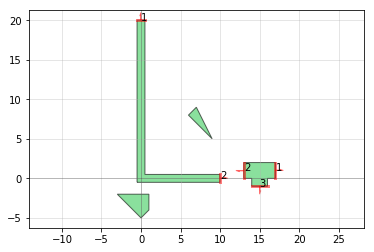

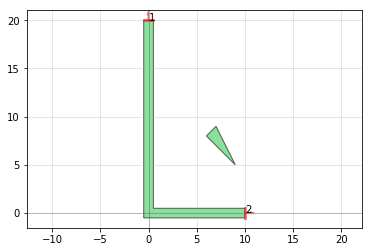

In [46]:
#==============================================================================
# Removing geometry
#==============================================================================
# If you want, you can remove DeviceReferences or Polygons with D.remove()

# Let's add some geometry to a blank Device D:
D = Device()
myell1 = D.add_ref(pg.L())
mytee2 = D.add_ref(pg.tee().movex(15))
mypoly1 = D.add_polygon( [(8,6,7,9), (6,8,9,5)] )
mypoly2 = D.add_polygon( [(0, 0), (1, 1), (1, 3), (-3, 3)] ).movey(-5)
qp(D)

# Now we can remove two of the elements we don't want anymore
D.remove(mytee2)
D.remove(mypoly2)
qp(D)

In [47]:
#==============================================================================
# Save / export to SVG
#==============================================================================
# For figure-quality publications sometimes you want to save your geometry
# as a more convenient vector file format like SVG (for Inkscape, Illustrator, 
# etc). For that purpose you can use the write_svg() command
from phidl.utilities import write_svg

D = Device()
D << pg.snspd_expanded(layer = 1)
D << pg.snspd_expanded(layer = 2).rotate(45)
write_svg(D, filename = 'MyGeometryFigure.svg')

'MyGeometryFigure.svg'

In [48]:
#==============================================================================
# Advanced: Using the LRU Cache decorator
#==============================================================================
# Let's assume you have a Device-making function which takes a long time,
# for instance because it requires extensive computations to calculate polygon
# points.  PHIDL has a LRU cache decorator you can use, similar to the
# built-in Python functools.lru_cache.  The cache can significantly speed up
# 
import time
from phidl import device_lru_cache

@device_lru_cache
def computationally_intensive_device(width = 10, height = 1):
    D = Device()
    time.sleep(1.5) # Pretend we're doing computations for 1.5 seconds here
    D.add_polygon( [(width,6,7,9), (6,8,9,5)] )
    return D

# When we first generate the Device, it takes the usual amount of time to
# generate.
time_start = time.time()
DC1 = computationally_intensive_device(width = 10, height = 1)
print('Function took %s seconds to run initially' % (time.time()-time_start))

# However, if we use the same input arguments, since we already computed the
# Device using those arguments the cache can return a copy much quicker
time_start = time.time()
DC2 = computationally_intensive_device(width = 10, height = 1)
print('Function took %s seconds to run a second time' % (time.time()-time_start))

# Note that if we change the input arguments, we still need to generate
# the function again (even if that argument isn't used!)
time_start = time.time()
DC2 = computationally_intensive_device(width = 10, height = 2.7)
print('Function with new arguments took %s seconds to run' % (time.time()-time_start))

Function took 1.512892484664917 seconds to run initially
Function took 0.0 seconds to run a second time
Function with new arguments took 1.5018162727355957 seconds to run
